# Evaluate Performance of Alogrithms(KNN,SVM,LR,DT)

Comparing performance of different manchine learning algorithms

In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [10]:
# read in the iris data
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

In [11]:
# use train/test split with different random_state values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)



## Finding best value for K: 



In [12]:
# search for an optimal value of K for KNN
# Suppose we set the range of K is from 1 to 31.
from sklearn.cross_validation import cross_val_score
k_range = list(range(1, 31))

# An list that stores different accuracy scores.
k_scores = []

for k in k_range:
    # Your code: 
    # First, initilize a knn model with number k 
    # Second, use 10-fold cross validation to get 10 scores with that model.
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

# find best k and print
best_k = k_range[k_scores.index(max(k_scores))]
print ("The best value for K is %d" % best_k)

C:\Users\ASH\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


The best value for K is 13


## Create KNN and SVM models and compare : 

In [13]:
# Load libraries
import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# Build models
models = []
models.append(('LR', LogisticRegression()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=13)))
models.append(('CART', DecisionTreeClassifier()))
#models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
toplotx = []
toploty = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=4)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    toplotx.append(name)
    toploty.append(cv_results.mean())
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    

LR: 0.963636 (0.044536)
KNN: 0.981818 (0.036364)
CART: 0.955303 (0.060459)
SVM: 0.972727 (0.041660)


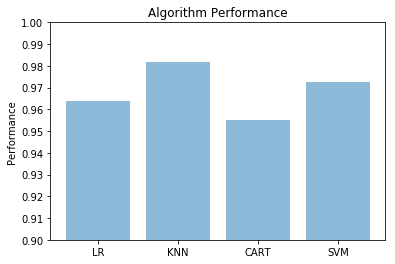

In [14]:
# Compare Algorithms
import numpy as np
import matplotlib.ticker as ticker

ax = plt.axes()
ax.yaxis.set_major_locator(ticker.MultipleLocator(.01))
#ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.01))
ax.set_ylim(ymin=.9)
y_pos = np.arange(len(toplotx))
plt.bar(y_pos, toploty, align='center', alpha=0.5)
plt.xticks(y_pos, toplotx)
plt.ylabel('Performance')
plt.title('Algorithm Performance')
 
plt.show()

## From above experiment, seems like KNN is giving best performance.  Planning to use KNN for Project